## Supermarket Store Branches’ Sales Analysis
The data is obtained from the project from the University

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
# load and read the dataset
Stores_data = pd.read_csv (r'C:\Users\debbi\OneDrive\Documents\Quantum\Python2\Python Projects\Stores.csv')
Stores_data

,Store_id,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,0,1,1659,1961,530,66490
1,1,2,1461,1752,210,39820
2,2,3,1340,1609,720,54010
3,3,4,1451,1748,620,53730
4,4,5,1770,2111,450,46620
...,...,...,...,...,...,...
891,891,892,1582,1910,1080,66390
892,892,893,1387,1663,850,82080
893,893,894,1200,1436,1060,76440
894,894,895,1299,1560,770,96610


In [18]:
# Display the first few rows of the DataFrame
print(Stores_data.head())

   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1        1659             1961                   530        66490
1          2        1461             1752                   210        39820
2          3        1340             1609                   720        54010
3          4        1451             1748                   620        53730
4          5        1770             2111                   450        46620


In [75]:
# Display the first few rows of the DataFrame
print(Stores_data.tail())

     Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
891        892        1582             1910                  1080        66390
892        893        1387             1663                   850        82080
893        894        1200             1436                  1060        76440
894        895        1299             1560                   770        96610
895        896        1174             1429                  1110        54340


## Data Inspection and Manipulation

In [76]:
# shape of the data
Stores_data.shape

(896, 5)

In [77]:
Stores_data.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [78]:
Stores_data.dtypes

Store ID                int64
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object

In [4]:
Stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [19]:
print(Stores_data.describe())

        Store ID    Store_Area  Items_Available  Daily_Customer_Count  \
count  896.000000   896.000000       896.000000            896.000000   
mean   448.500000  1485.409598      1782.035714            786.350446   
std    258.797218   250.237011       299.872053            265.389281   
min      1.000000   775.000000       932.000000             10.000000   
25%    224.750000  1316.750000      1575.500000            600.000000   
50%    448.500000  1477.000000      1773.500000            780.000000   
75%    672.250000  1653.500000      1982.750000            970.000000   
max    896.000000  2229.000000      2667.000000           1560.000000   

         Store_Sales  
count     896.000000  
mean    59351.305804  
std     17190.741895  
min     14920.000000  
25%     46530.000000  
50%     58605.000000  
75%     71872.500000  
max    116320.000000  


In [5]:
# check if there are missing values #isna( #) isnull()
Stores_data.isna().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

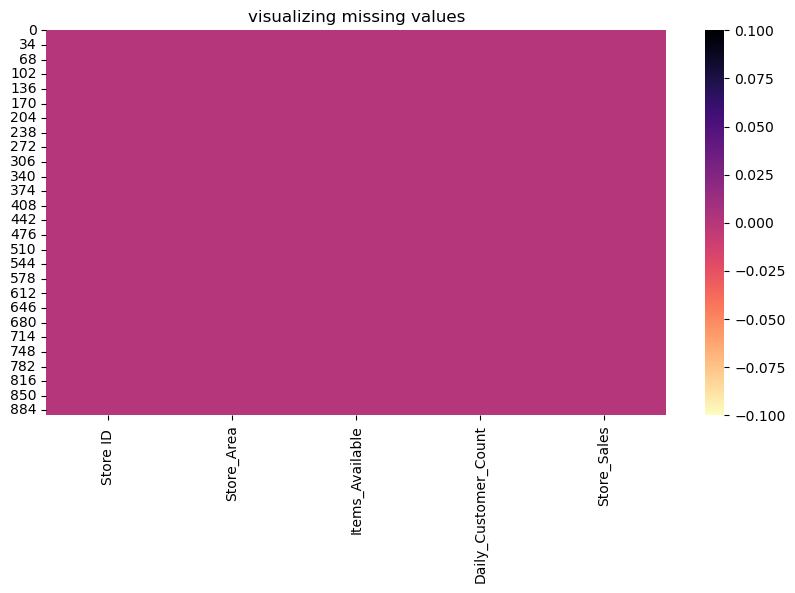

In [7]:
# visualize the missing values
plt.figure(figsize = (10, 5))
plt.title('visualizing missing values')
sns.heatmap(Stores_data.isnull(), cbar = True, cmap = 'magma_r')
plt.show()

## Univariate Analysis
it is considering one feature of a dataset

In [88]:
Stores_data.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [89]:
# How many listings are there per Store?
count_listing = Stores_data['Store_Area'].value_counts().sort_values(ascending = True)
count_listing

1259    1
1724    1
986     1
967     1
1651    1
       ..
1539    5
1440    5
1458    5
1513    5
1439    5
Name: Store_Area, Length: 583, dtype: int64

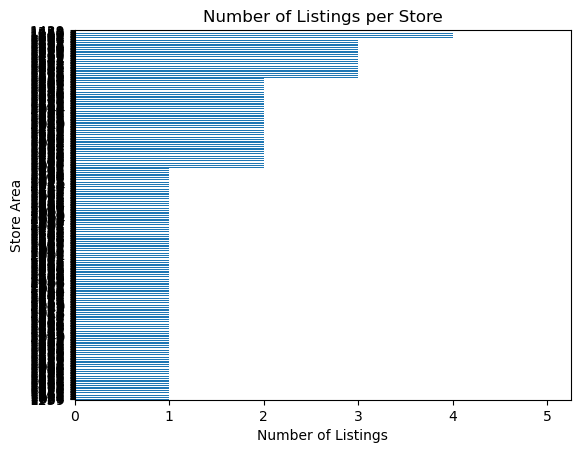

In [90]:
count_listing.plot(kind='barh')
plt.xlabel('Number of Listings')
plt.ylabel('Store Area')
plt.title('Number of Listings per Store')
plt.show()

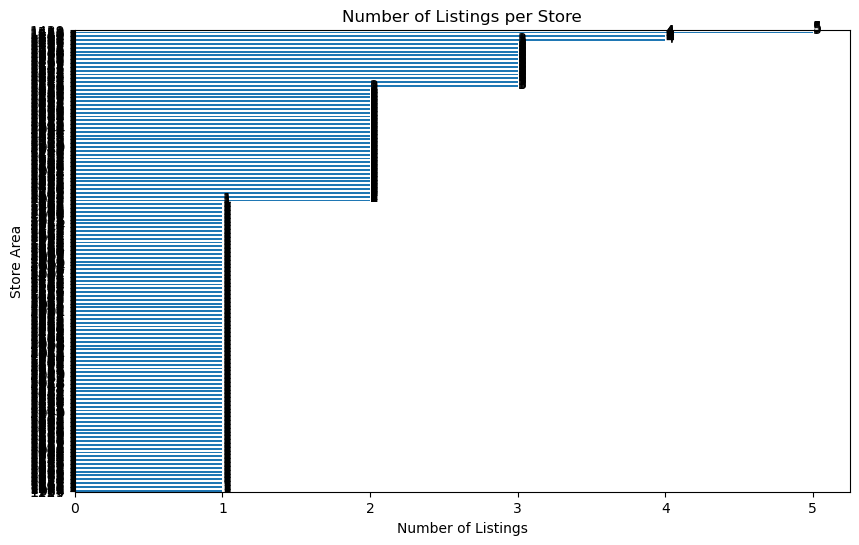

In [91]:
import matplotlib.pyplot as plt

count_listing = Stores_data['Store_Area'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
count_listing.plot(kind='barh')

# Add data labels
for i, v in enumerate(count_listing):
    plt.text(v, i, str(v))

plt.xlabel('Number of Listings')
plt.ylabel('Store Area')
plt.title('Number of Listings per Store')
plt.show()


## Observation
The highest number of listing per stores is five.

## Sales performance by store branches

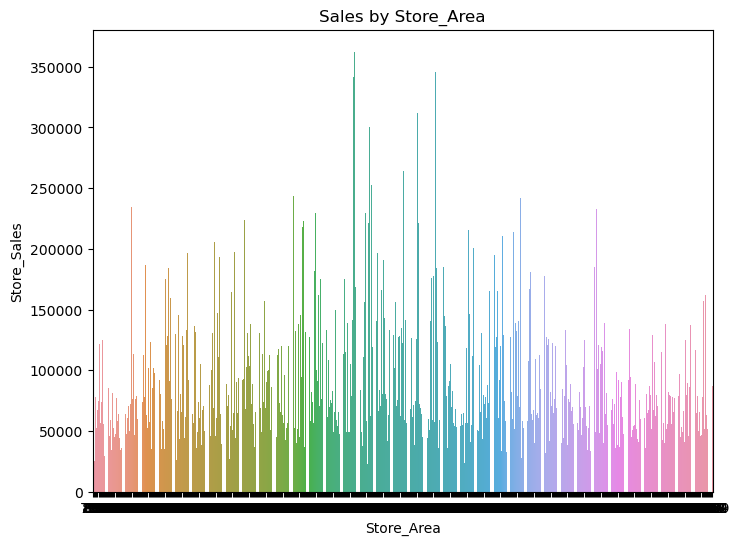

In [30]:
# Calculate total sales by store branch
branch_sales = Stores_data.groupby('Store_Area')['Store_Sales'].sum()

# Visualize sales by store branch
plt.figure(figsize=(8, 6))
sns.barplot(x=branch_sales.index, y=branch_sales.values)
plt.xlabel('Store_Area')
plt.ylabel('Store_Sales')
plt.title('Sales by Store_Area')
plt.show()

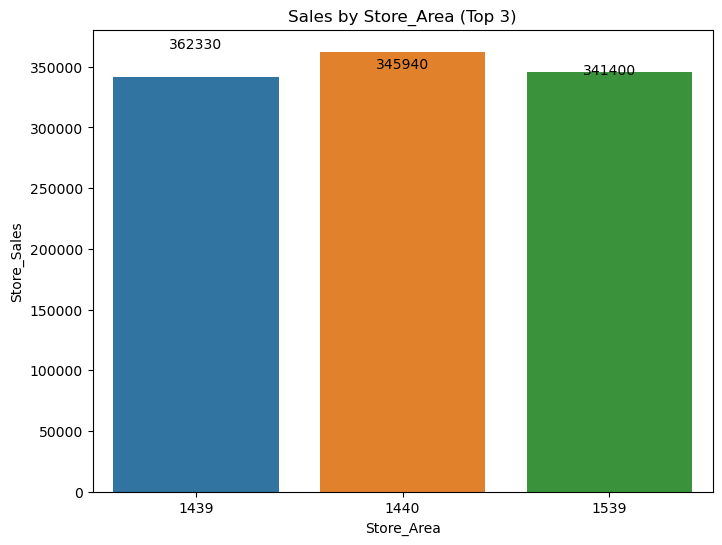

In [4]:
import seaborn as sns

# Calculate total sales by store branch
branch_sales = Stores_data.groupby('Store_Area')['Store_Sales'].sum().nlargest(3)

# Visualize sales by store branch
plt.figure(figsize=(8, 6))
sns.barplot(x=branch_sales.index, y=branch_sales.values)

# Add data labels
for i, v in enumerate(branch_sales.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Store_Area')
plt.ylabel('Store_Sales')
plt.title('Sales by Store_Area (Top 3)')
plt.show()


## Observation:
Store area with the number 1440 has the highest top3 sales with the value of 345940.

## Product performance by store sales

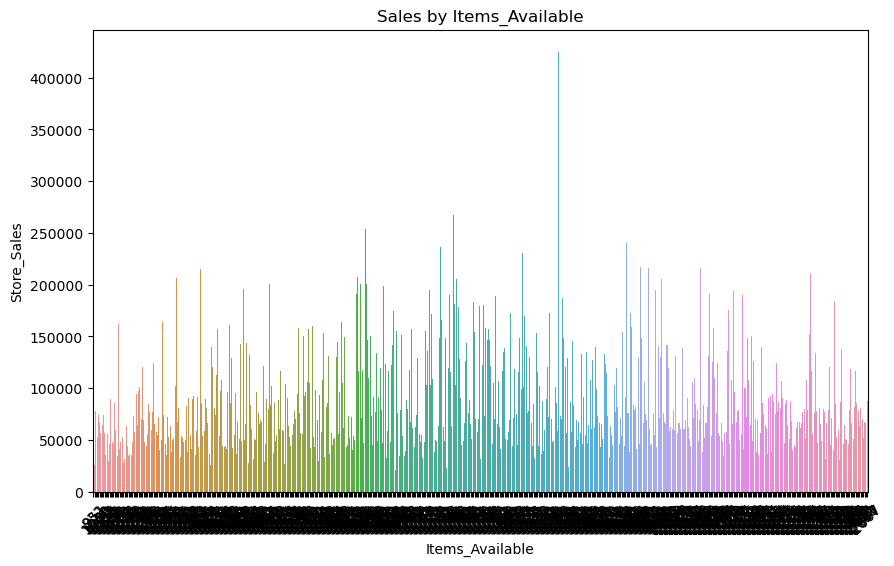

In [84]:
# Calculate total sales by product category
category_sales = Stores_data.groupby('Items_Available')['Store_Sales'].sum()

# Visualize sales by product category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.xlabel('Items_Available')
plt.ylabel('Store_Sales')
plt.title('Sales by Items_Available')
plt.xticks(rotation=45)
plt.show()

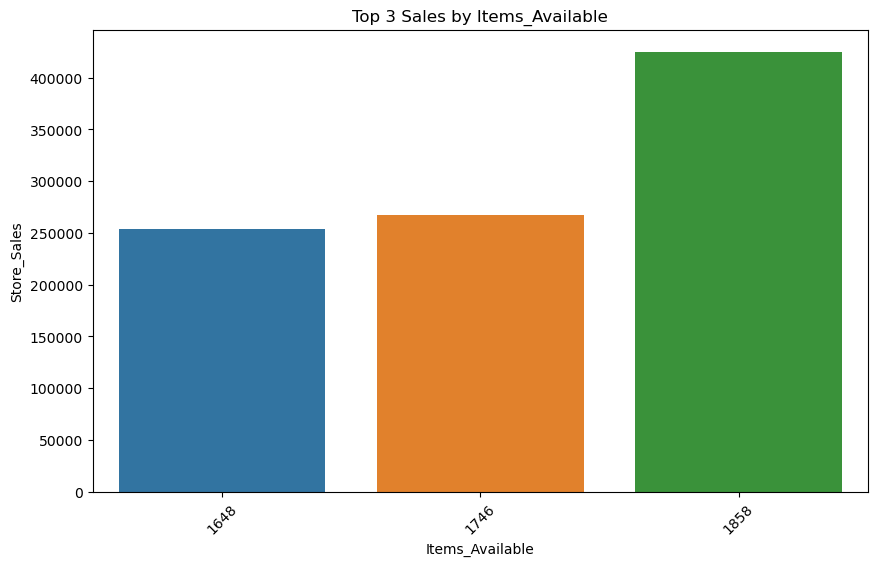

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'Items_Available' and calculate the sum of 'Store_Sales'
category_sales = Stores_data.groupby('Items_Available')['Store_Sales'].sum()

# Sort the grouped data in descending order and select the top 3 sales
top_3_sales = category_sales.sort_values(ascending=False).head(3)

# Visualize sales by 'Items_Available'
plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_sales.index, y=top_3_sales.values)
plt.xlabel('Items_Available')
plt.ylabel('Store_Sales')
plt.title('Top 3 Sales by Items_Available')
plt.xticks(rotation=45)
plt.show()


## Observation: 
Items available with the number 1858 has the highest top3 sales in terms of Product performance.  

## Correlation betweem store area and daily customer count

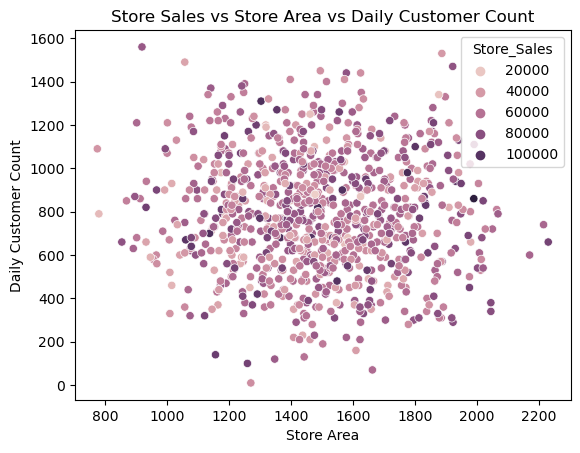

NameError: name 'sales_data' is not defined

In [67]:
# Scatter plot to visualize the relationship
sns.scatterplot(data=Stores_data, x='Store_Area', y='Daily_Customer_Count', hue='Store_Sales')
plt.xlabel('Store Area')
plt.ylabel('Daily Customer Count')
plt.title('Store Sales vs Store Area vs Daily Customer Count')
plt.show()

# Correlation analysis
correlation_matrix = sales_data[['Store_Sales', 'Store_Area', 'Daily_Customer_Count']].corr()
print(correlation_matrix)

## Observation
Store_Sales has the highest value of 100,000 and 20,000 as the least values with daily customer count.
